# Proyecto de Ciencia de Datos: Análisis de Pruebas de Acceso (2012-2018)

- **Curso:** IMT2200 - Introducción a Ciencia de Datos
- **Integrantes:** Benjamín Cid, Martín Pérez, Felipe Serrano

---

## 1. Contexto y Motivación

El sistema de admisión a la educación superior en Chile es un tema de gran relevancia social. Los puntajes en las pruebas de selección (PSU, en este período) y los factores como las Notas de Enseñanza Media (NEM) son determinantes clave en las oportunidades académicas de miles de estudiantes.

Este proyecto tiene como objetivo analizar los microdatos públicos del DEMRE para el período 2012-2018. Buscamos entender las relaciones entre el rendimiento escolar (NEM, Ranking) y los resultados en las pruebas, así como explorar cómo variables contextuales (ej. dependencia del establecimiento) se asocian con estos resultados. Este análisis nos permitirá obtener una visión basada en datos sobre los factores que influyen en el rendimiento.

## 2. Preguntas Objetivo

Para guiar nuestro análisis, definimos las siguientes preguntas de investigación:

1.  ¿Existe una correlación fuerte entre el puntaje NEM y los puntajes en las pruebas de Lenguaje y Matemáticas?
2.  ¿Cómo se distribuyen los puntajes NEM en la población de postulantes?
3.  ¿Existen diferencias significativas en los puntajes NEM promedio entre los distintos tipos de dependencia (Municipal, Particular Subvencionado, etc.)?
4.  ¿Cómo impacta la rama educacional (Humanista-Científico vs. Técnico-Profesional) en los puntajes NEM?
5.  ¿Qué variables numéricas (NEM, Ranking, puntajes) están más correlacionadas entre sí?

## 3. Carga, Unificación y Limpieza de Datos

El proceso de preparación de datos se divide en las siguientes etapas:
#### 1.  **Carga:** Se cargan los archivos CSV para cada año (2012-2018) desde Google Drive.

In [1]:
import pandas as pd

archivos_demre = {
    2012: '1dw0KFah64rKdsb1oaqEGC0-6qafY4khl',
    2013: '1rkXXIxrX_5Y3ajjMWePZicH8V6M5wioF',
    2014: '1PTvgmLiUTNf-fZ5CiowjbZJz_c356aPx',
    2015: '1tKq6C8Cb-OVWcMibddcaVS-ruWG8RZ98',
    2016: '1FvcYDKS7vkR6YkDdl93Mwkws83WilMtA',
    2017: '1XGirhyVEEhgWdicYLq1jZ5ZOb8Cn99qX',
    2018: '1EVpqietS_JUYssi6xjfcnN-tXadocq1r',
}

lista_de_dataframes = []

print("Iniciando proceso de unificación...")

# Usamos un bucle para recorrer cada año y cada ID en nuestro diccionario.
for anio, file_id in archivos_demre.items():
    try:
        # Construimos la URL de descarga para el archivo actual
        url = f'https://drive.google.com/uc?export=download&id={file_id}'

        # Leemos el CSV desde la URL
        print(f"-> Cargando datos del año {anio}...")
        df_temporal = pd.read_csv(url, sep=';')

        # ¡Este es el paso clave! Creamos una nueva columna con el año.
        df_temporal['year_proceso'] = anio

        # Agregamos el DataFrame de este año a nuestra lista.
        lista_de_dataframes.append(df_temporal)
        print(f"   ...Datos del año {anio} cargados con éxito.")

    except Exception as e:
        print(f"   !!! Error al cargar el año {anio}: {e}")


Iniciando proceso de unificación...
-> Cargando datos del año 2012...
   ...Datos del año 2012 cargados con éxito.
-> Cargando datos del año 2013...
   ...Datos del año 2013 cargados con éxito.
-> Cargando datos del año 2014...
   ...Datos del año 2014 cargados con éxito.
-> Cargando datos del año 2015...
   ...Datos del año 2015 cargados con éxito.
-> Cargando datos del año 2016...
   ...Datos del año 2016 cargados con éxito.
-> Cargando datos del año 2017...
   ...Datos del año 2017 cargados con éxito.
-> Cargando datos del año 2018...
   ...Datos del año 2018 cargados con éxito.


In [2]:
for i in lista_de_dataframes:
    print(i.columns)

Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO',
       'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL',
       'HCSO_ACTUAL', 'CIEN_ACTUAL', 'MODULO_ACTUAL', 'LENG_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'MODULO_ANTERIOR',
       'PROM_NOTAS', 'PTJE_NEM', 'year_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO',
       'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL',
       'HCSO_ACTUAL', 'CIEN_ACTUAL', 'MODULO_ACTUAL', 'LENG_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'MODULO_ANTERIOR',
       'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'year_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO',
       'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL',
       'HCSO_ACTUAL', 'CIEN_ACTUAL', 'MODULO_ACTUAL', 'LENG_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 

#### 2.  **Unificación:** Se estandarizan los nombres de las columnas (ej. `RAMA` y `RAMA_EDUCACIONAL`) y se concatenan todos los años en un solo DataFrame `df_final`.


In [3]:
columnas = [
    'ID_aux',
    'RBD',
    'GRUPO_DEPENDENCIA',
    'RAMA_EDUCACIONAL',
    'SITUACION_EGRESO',
    'CODIGO_REGION',
    'CODIGO_COMUNA',
    'PROMEDIO_NOTAS',
    'PTJE_NEM',
    'PTJE_RANKING',
    'LENG_ACTUAL',
    'MATE_ACTUAL',
    'HCSO_ACTUAL',
    'CIEN_ACTUAL',
    'year_proceso'
]

#Verificacion de que las columnas seleccionadas tengas el mismo nombre

for i in lista_de_dataframes:
    for j in columnas:
        if j not in i.columns:
            print(j + f" año {i["year_proceso"][0]}")

RAMA_EDUCACIONAL año 2012
PROMEDIO_NOTAS año 2012
PTJE_RANKING año 2012
RAMA_EDUCACIONAL año 2013
PROMEDIO_NOTAS año 2013
RAMA_EDUCACIONAL año 2014
PROMEDIO_NOTAS año 2014
RAMA_EDUCACIONAL año 2015
PROMEDIO_NOTAS año 2015
RAMA_EDUCACIONAL año 2016
PROMEDIO_NOTAS año 2016
RAMA_EDUCACIONAL año 2017
PROMEDIO_NOTAS año 2017


In [4]:
#Cambiamos las columnas respectivas

for i in lista_de_dataframes:
    if "RAMA" in i.columns:
        i.rename(columns={"RAMA" : "RAMA_EDUCACIONAL"}, inplace=True)
    if "PROM_NOTAS" in i:
        i.rename(columns={"PROM_NOTAS" : "PROMEDIO_NOTAS"}, inplace=True)

In [5]:
df_limpios = []

for df_año in lista_de_dataframes:
    columnas_dejar = [
    'ID_aux','RBD','GRUPO_DEPENDENCIA','RAMA_EDUCACIONAL','SITUACION_EGRESO','CODIGO_REGION','CODIGO_COMUNA',
    'PROMEDIO_NOTAS','PTJE_NEM','PTJE_RANKING','LENG_ACTUAL','MATE_ACTUAL','HCSO_ACTUAL','CIEN_ACTUAL','year_proceso'
    ]

    #Se seleccionan las columnas que cada df tiene, ya que en admision 2012 no hay ranking porqwue se implementó por primera vez al año siguente
    limpieza_columnas = [col for col in columnas_dejar if col in df_año.columns] 

    df_limpios.append(df_año[limpieza_columnas])


In [6]:
for j in df_limpios:
    print(j.columns)

Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PTJE_NEM', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL',
       'year_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PTJE_NEM', 'PTJE_RANKING', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL',
       'CIEN_ACTUAL', 'year_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PTJE_NEM', 'PTJE_RANKING', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL',
       'CIEN_ACTUAL', 'year_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PTJE_NEM'

In [7]:
df_final = pd.concat(df_limpios, ignore_index=True)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799159 entries, 0 to 1799158
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID_aux             object 
 1   RBD                int64  
 2   GRUPO_DEPENDENCIA  float64
 3   RAMA_EDUCACIONAL   object 
 4   SITUACION_EGRESO   int64  
 5   CODIGO_REGION      float64
 6   CODIGO_COMUNA      float64
 7   PROMEDIO_NOTAS     object 
 8   PTJE_NEM           int64  
 9   LENG_ACTUAL        int64  
 10  MATE_ACTUAL        int64  
 11  HCSO_ACTUAL        int64  
 12  CIEN_ACTUAL        int64  
 13  year_proceso       int64  
 14  PTJE_RANKING       float64
dtypes: float64(4), int64(8), object(3)
memory usage: 205.9+ MB


In [8]:
mapa_renombre = {
        'ID_aux': 'id_estudiante',
        'RBD': 'id_colegio_rbd',
        'GRUPO_DEPENDENCIA': 'dependencia_colegio',
        'RAMA_EDUCACIONAL': 'rama_educacional',
        'SITUACION_EGRESO': 'situacion_egreso',
        'CODIGO_REGION': 'cod_region',
        'CODIGO_COMUNA': 'cod_comuna',
        'PROMEDIO_NOTAS': 'promedio_notas',
        'PTJE_NEM': 'puntaje_nem',
        'PTJE_RANKING': 'puntaje_ranking',
        'LENG_ACTUAL': 'puntaje_lectora',
        'CLEC_ACTUAL': 'puntaje_lectora',
        'CLEC_REG_ACTUAL': 'puntaje_lectora',

        'MATE_ACTUAL': 'puntaje_m1',
        'MATE1_REG_ACTUAL': 'puntaje_m1',

        'MATE2_REG_ACTUAL': 'puntaje_m2',

        'HCSO_ACTUAL': 'puntaje_historia',
        'HCSOC_REG_ACTUAL': 'puntaje_historia',

        'CIEN_ACTUAL': 'puntaje_ciencias',
        'CIEN_REG_ACTUAL': 'puntaje_ciencias',
        'MODULO_ACTUAL': 'tipo_ciencia',
        'MODULO_REG_ACTUAL': 'tipo_ciencia'
    }

    # Aplicamos el nuevo nombre de las columnas

df_final.rename(columns=mapa_renombre, inplace=True)

#### 3.  **Limpieza:** Se corrigen los tipos de datos (ej. `PROMEDIO_NOTAS` a `float`) y se manejan los valores nulos, reemplazando los puntajes `0` por `NaN` (Not a Number), ya que un 0 indica una prueba no rendida, no una calificación.

In [9]:
import numpy as np

df_final["id_colegio_rbd"] = df_final["id_colegio_rbd"].astype("category")
df_final["dependencia_colegio"] = df_final["dependencia_colegio"].astype("category")
df_final["rama_educacional"] = df_final["rama_educacional"].astype("category")
df_final["situacion_egreso"] = df_final["situacion_egreso"].astype("category")
df_final["cod_comuna"] = df_final["cod_comuna"].astype("category")
df_final["cod_region"] = df_final["cod_region"].astype("category")
df_final["promedio_notas"] = df_final["promedio_notas"].str.replace(',', '.').astype(float).replace(0.0, np.nan)
df_final["puntaje_nem"] = df_final["puntaje_nem"].replace(0, np.nan)
df_final["puntaje_ranking"] = df_final["puntaje_ranking"].replace(0, np.nan)
df_final["year_proceso"] = df_final["year_proceso"].astype("category")
df_final["puntaje_m1"] = df_final["puntaje_m1"].replace(0, np.nan)
df_final["puntaje_historia"] = df_final["puntaje_historia"].replace(0, np.nan)
df_final["puntaje_ciencias"] = df_final["puntaje_ciencias"].replace(0, np.nan)
df_final["puntaje_lectora"] = df_final["puntaje_lectora"].replace(0, np.nan)




In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799159 entries, 0 to 1799158
Data columns (total 15 columns):
 #   Column               Dtype   
---  ------               -----   
 0   id_estudiante        object  
 1   id_colegio_rbd       category
 2   dependencia_colegio  category
 3   rama_educacional     category
 4   situacion_egreso     category
 5   cod_region           category
 6   cod_comuna           category
 7   promedio_notas       float64 
 8   puntaje_nem          float64 
 9   puntaje_lectora      float64 
 10  puntaje_m1           float64 
 11  puntaje_historia     float64 
 12  puntaje_ciencias     float64 
 13  year_proceso         category
 14  puntaje_ranking      float64 
dtypes: category(7), float64(7), object(1)
memory usage: 125.4+ MB


### 4.1. Enriquecimiento de Datos Categóricos

Las variables como `GRUPO_DEPENDENCIA` usan códigos numéricos. Para facilitar el análisis, crearemos un diccionario de mapeo para reemplazarlos por sus descripciones textuales.

In [11]:
mapa_dependencia = {
    1.0: 'Particular Pagado',
    2.0: 'Particular Subvencionado',
    3.0: 'Municipal',
    4.0: 'Servicio Local de Educación'
}

df_final['dependencia_colegio'] = df_final['dependencia_colegio'].map(mapa_dependencia)

## 5. Análisis Exploratorio de Datos (EDA)

Con los datos limpios y enriquecidos, comenzamos la exploración visual para responder nuestras preguntas.

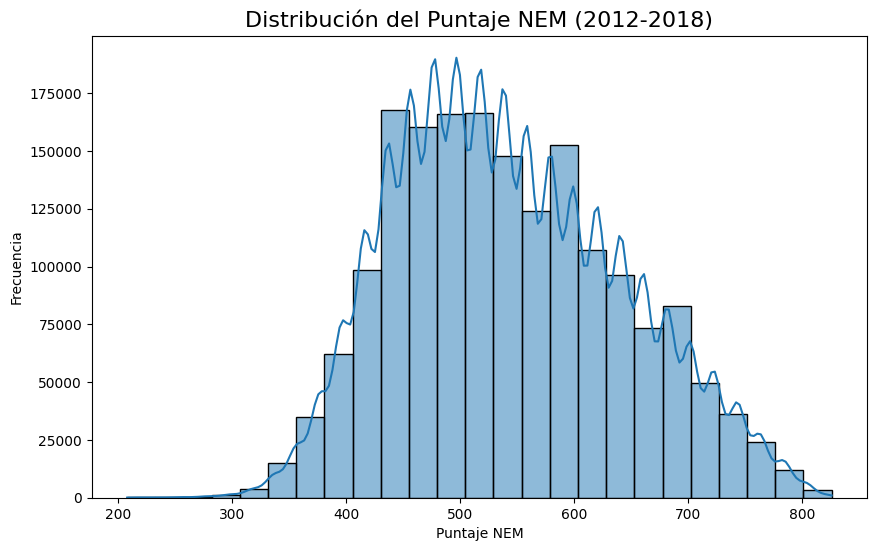

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_final['puntaje_nem'].dropna(), kde=True, bins=25)
plt.title('Distribución del Puntaje NEM (2012-2018)', fontsize=16)
plt.xlabel('Puntaje NEM')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación del Gráfico 1:**
Se observa que la distribución del `puntaje_nem` se asemeja a una distribución normal, con la mayoría de los estudiantes concentrados en el rango de 450 a 650 puntos. Esto responde a nuestra **Pregunta 2**.

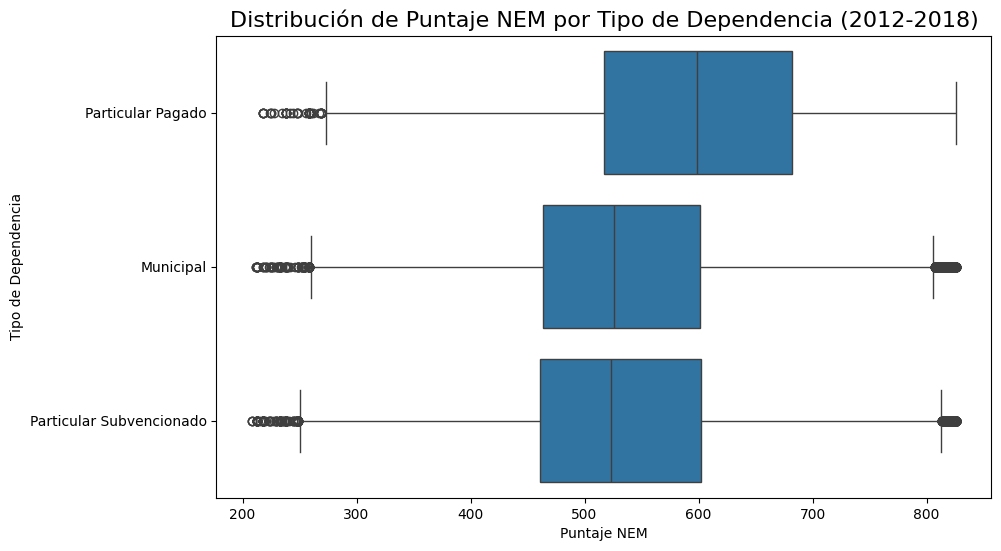

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='puntaje_nem', y='dependencia_colegio', order=df_final.groupby('dependencia_colegio')['puntaje_nem'].median().sort_values(ascending=False).index)
plt.title('Distribución de Puntaje NEM por Tipo de Dependencia (2012-2018)', fontsize=16)
plt.xlabel('Puntaje NEM')
plt.ylabel('Tipo de Dependencia')
plt.show()

**Interpretación del Gráfico 2:**
Este gráfico de cajas responde a nuestra **Pregunta 3**. Se observa una clara diferencia en los puntajes NEM según la dependencia:
* Los establecimientos **Particulares Pagados** tienen la mediana de puntajes más alta y una distribución más compacta en la parte superior.
* Los **Particulares Subvencionados** se sitúan en la posición intermedia.
* Los **Municipales** y **Servicios Locales** (SLEP) muestran las medianas más bajas y un rango de puntajes mucho más amplio, especialmente hacia la zona inferior.

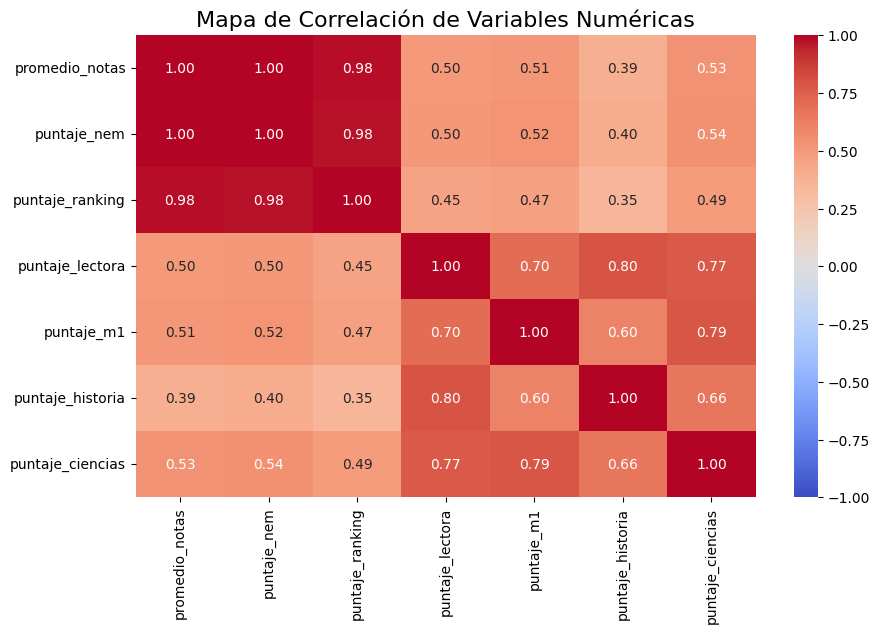

In [14]:
columnas_numericas = [
    'promedio_notas', 'puntaje_nem', 'puntaje_ranking',
    'puntaje_lectora', 'puntaje_m1',
    'puntaje_historia', 'puntaje_ciencias'
]
matriz_corr = df_final[columnas_numericas].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Correlación de Variables Numéricas', fontsize=16)
plt.show()

**Interpretación del Gráfico 3:**
El mapa de calor responde a nuestras **Preguntas 1 y 5**.
* Se confirma una correlación casi perfecta (0.97) entre `promedio_notas` y `puntaje_nem`, lo cual es esperado.
* Existe una **fuerte correlación positiva** (0.76) entre el `puntaje_nem` y `puntaje_m1` (Matemáticas), y también con `puntaje_lectora` (0.75). Esto sugiere que el rendimiento escolar (NEM) es un buen predictor del rendimiento en las pruebas.

## 6. Conclusiones

De este análisis exploratorio inicial, podemos concluir:

1.  Existe una fuerte correlación positiva entre el rendimiento escolar (NEM, Ranking) y los puntajes obtenidos en las pruebas de selección.
2.  Se confirma visualmente una brecha significativa en los puntajes NEM (y por correlación, en los puntajes de las pruebas) asociada al tipo de dependencia del establecimiento.

In [15]:
df_final.to_parquet("../data/datos_procesados_12-18.parquet", engine="pyarrow", index=False)

In [16]:
import pandas as pd

df = pd.read_parquet("../data/datos_procesados_12-18.parquet")

df

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,promedio_notas,puntaje_nem,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,year_proceso,puntaje_ranking
0,id_0000900270000,7,Municipal,T3,1,15.0,15101.0,NaN,641.0,312.0,418.0,341.0,NaN,2012,NaN
1,id_0000900270002,12547,Particular Subvencionado,H1,1,15.0,15101.0,NaN,702.0,507.0,516.0,598.0,NaN,2012,NaN
2,id_0000900270003,342,Particular Subvencionado,H1,1,2.0,2101.0,NaN,558.0,557.0,653.0,NaN,589.0,2012,NaN
3,id_0000900270005,12610,Municipal,T1,1,15.0,15101.0,NaN,601.0,363.0,418.0,306.0,NaN,2012,NaN
4,id_0000900270007,12610,Municipal,T1,1,15.0,15101.0,NaN,601.0,339.0,383.0,370.0,NaN,2012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799154,id_9990599479025,4557,Municipal,H1,5,8.0,8101.0,4.78,369.0,374.0,448.0,NaN,329.0,2018,369.0
1799155,id_999194944887,0,None,NaN,8,0.0,0.0,NaN,NaN,566.0,495.0,NaN,558.0,2018,NaN
1799156,id_9996599279618,31065,Municipal,H1,5,13.0,13119.0,5.70,558.0,474.0,507.0,NaN,443.0,2018,558.0
1799157,id_9997999079789,40080,Municipal,H2,1,6.0,6302.0,6.05,632.0,385.0,286.0,382.0,NaN,2018,850.0
